In [137]:
import os

import librosa
import matplotlib.pyplot as plt
import numpy as np
import h5py
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [138]:
h5_path = '/projects/MultiActiveAI/Samir_Wav2Vec/Features/Audio_Files'
wav_path = '/projects/MultiActiveAI/Samir_Wav2Vec/Audio_Files'

In [139]:
h5_files = [f"{i:06}.h5context" for i in range(0, 10_000)]
wav_files = [f"{i:06}.wav" for i in range(0, 10)]

In [140]:
all_feats = []
for h5_file in h5_files:
    with h5py.File(os.path.join(h5_path, h5_file), "r") as f:
        feats = np.array(f['features'])
        info = list(f['info'])
    feats = np.reshape(feats, (int(info[1]), int(info[2]))).T
    all_feats.extend(list(feats))

In [141]:
np.array(all_feats).shape

(4490000, 512)

In [153]:
clusters = KMeans(n_clusters=20).fit_predict(all_feats)

In [154]:
all_feats_pca = PCA(n_components=2).fit_transform(all_feats)

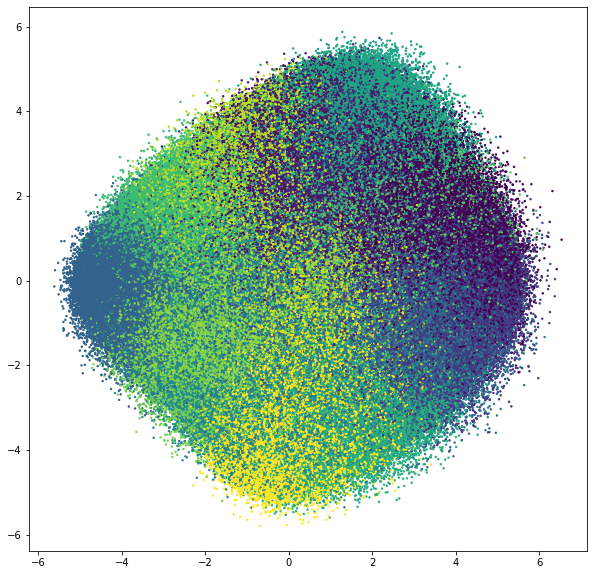

In [155]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(all_feats_pca[:, 0], all_feats_pca[:, 1], c=clusters, s=2)
# ax.scatter(feats_pca[37:62, 0], feats_pca[37:62, 1], c="orange", s=2)
# ax.scatter(feats_pca[37:62, 0], feats_pca[37:62, 1], c="pink", s=2)
# ax.scatter(feats_pca[500:1000, 0], feats_pca[500:1000, 1], s=5)
plt.show()

In [156]:
# clusters[24:50]
# clusters[252:279]
# clusters[110:180]
clusters[4 * 449 + 300 : 4 * 449 + 400]


array([ 9,  9,  9,  9,  8,  8,  8,  7,  7, 19, 19,  9,  9,  9,  9,  9, 17,
       17,  8,  8,  8,  8,  8,  7,  7,  8,  8,  9,  9,  9,  9,  9,  9, 10,
        9,  8,  9,  8,  8,  8,  7,  8,  9,  9,  9,  9,  9,  9,  6,  9,  8,
        8,  8,  8,  8,  7, 19,  8,  9,  9,  9,  9,  9,  9,  8,  8,  8,  8,
        8,  7,  7,  8,  9,  9,  9,  9,  9, 15,  9,  9,  8,  8,  8,  8,  7,
        7,  8,  8,  9,  9,  9,  9,  9,  9, 16,  9,  8,  8,  8,  8],
      dtype=int32)

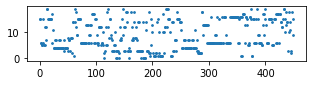

In [157]:
fig, ax = plt.subplots(figsize=(5, 1))
ax.scatter(range(len(clusters[:450])), clusters[:450], s=3)

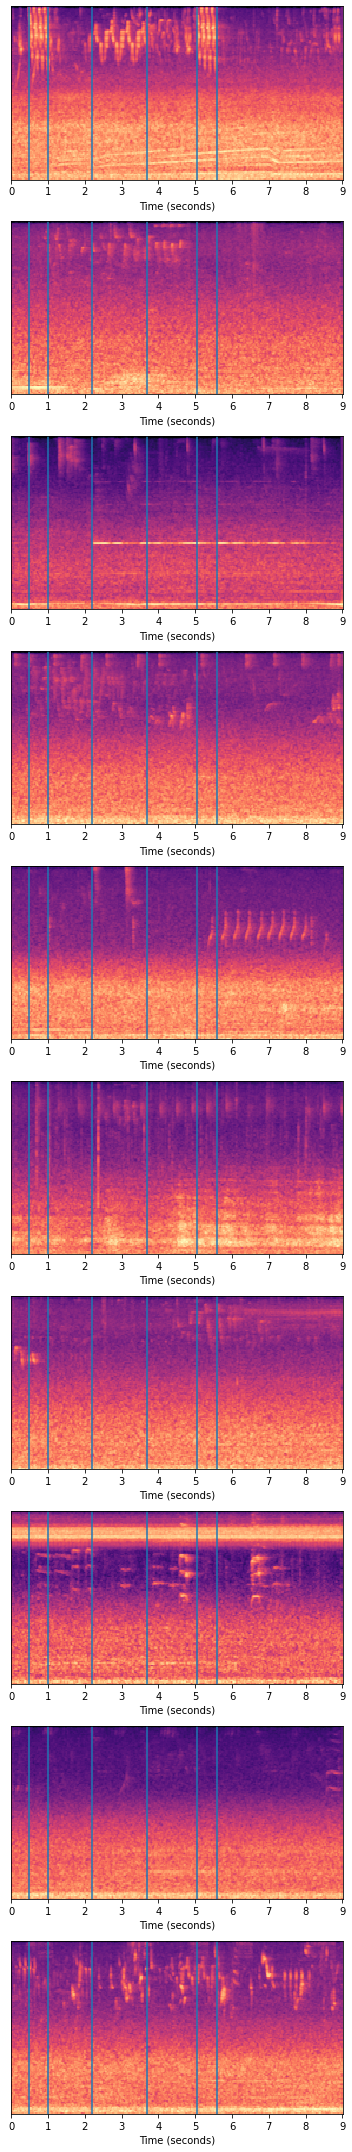

In [158]:
fig, axs = plt.subplots(len(wav_files), figsize=((5, len(wav_files) * 3)))

for wav_file, ax in zip(wav_files, axs):
    sample_path = os.path.join(wav_path, wav_file)
    y, sr = librosa.load(sample_path, sr=16_000)
    s = librosa.feature.melspectrogram(y=y, sr=sr)
    s = librosa.power_to_db(s, ref=np.max)
    librosa.display.specshow(s, sr=sr, x_axis='s', ax=ax)
    
    ax.axvline(24 * 9 / 450)
    ax.axvline(50 * 9 / 450)
    
    ax.axvline(110 * 9 / 450)
    ax.axvline(185 * 9 / 450)
    
    ax.axvline(252 * 9 / 450)
    ax.axvline(279 * 9 / 450)
    
fig.tight_layout()